In [1]:
import json
import pandas as pd
import re
import requests
import io

import tweepy

consumer_key = 'YOUR CONSUMER KEY'

consumer_secret = 'YOUR CONSUMER SECRET'

access_token = 'YOUR ACCESS TOKEN'

access_secret = 'YOUR ACCESS SECRET'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)

auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth)


# here i will retrieve data from Predication images

In [2]:
site = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
r = requests.get(url = site )


In [3]:
j = r.content

pred = pd.read_csv(io.StringIO(j.decode('utf-8')),sep='\t')
#pd.DataFrame()
pred.to_csv('Desktop/image_predictions.tsv')

In [4]:
pred_copy = pred.copy()
pred.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


# i will retreive twitter enhanced

In [5]:
tweet_enhanced = pd.read_csv('Downloads/twitter-archive-enhanced.csv')
tweet_enhanced_copy = tweet_enhanced.copy()

In [6]:
tweet_enhanced.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [7]:
def word_in_text(word, text):
    word = word.lower()
    text = text.lower()
    match = re.search(word, text)
    if match:
        return True
    return False

In [8]:
tweets = []
for line in open('Desktop/tweet-json.txt', 'r'):
    tweets.append(json.loads(line,parse_float=str))


In [9]:
df = pd.DataFrame(tweets)

In [10]:
# here i would like to write a new file to examine the data in full text 

df.full_text.to_csv('Desktop/full_txt.csv')
tweet_txt_copy = df.copy()

tweets[1]

In [11]:
df.head()

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
0,None,None,Tue Aug 01 16:23:56 +0000 2017,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",39467,False,This is Phineas. He's a mystical boy. Only eve...,None,...,False,NaN,NaN,NaN,8853,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,None,None,Tue Aug 01 00:17:27 +0000 2017,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",33819,False,This is Tilly. She's just checking pup on you....,None,...,False,NaN,NaN,NaN,6514,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,None,None,Mon Jul 31 00:18:03 +0000 2017,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...",25461,False,This is Archie. He is a rare Norwegian Pouncin...,None,...,False,NaN,NaN,NaN,4328,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,None,None,Sun Jul 30 15:58:51 +0000 2017,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...",42908,False,This is Darla. She commenced a snooze mid meal...,None,...,False,NaN,NaN,NaN,8964,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
4,None,None,Sat Jul 29 16:00:24 +0000 2017,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...",41048,False,This is Franklin. He would like you to stop ca...,None,...,False,NaN,NaN,NaN,9774,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
contributors                     0 non-null object
coordinates                      0 non-null object
created_at                       2354 non-null object
display_text_range               2354 non-null object
entities                         2354 non-null object
extended_entities                2073 non-null object
favorite_count                   2354 non-null int64
favorited                        2354 non-null bool
full_text                        2354 non-null object
geo                              0 non-null object
id                               2354 non-null int64
id_str                           2354 non-null object
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null object
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 non-null obj

In [13]:
#df.drop(['contributors','geo','coordinates'],axis=1,inplace=True)

In [14]:
df.lang.unique()

array(['en', 'und', 'in', 'eu', 'es', 'nl', 'tl', 'ro', 'et'],
      dtype=object)

In [15]:
name = []
for i in df['full_text']:
    if re.search(pattern='(This is)\ [A-z]\w*',string=i):
        name.append(re.search(pattern='(This is)\ [A-z]\w*',string=i).group(0))
    elif re.search(pattern='(name is)\ [A-z]\w*',string=i):
        name.append(re.search(pattern='(name is)\ [A-z]\w*',string=i).group(0))
    else :
        name.append('none')

In [16]:
df.sample(5)

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
549,None,None,Fri Dec 02 17:27:25 +0000 2016,"[0, 97]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 804738744741928960, 'id_str'...",15326,False,This is Django. He accidentally opened the fro...,None,...,False,NaN,NaN,NaN,4480,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
354,None,None,Mon Feb 13 01:46:03 +0000 2017,"[0, 60]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 830956118893543424, 'id_str'...",8735,False,Say hello to Reggie. He hates puns. 12/10 ligh...,None,...,False,NaN,NaN,NaN,1735,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1779,None,None,Fri Dec 18 03:54:25 +0000 2015,"[0, 88]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 677698398770888704, 'id_str'...",1332,False,This is Sadie. She got her holidays confused. ...,None,...,False,NaN,NaN,NaN,363,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1749,None,None,Mon Dec 21 17:33:48 +0000 2015,"[0, 95]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 678991763986624512, 'id_str'...",2537,False,If your Monday isn't going so well just take a...,None,...,False,NaN,NaN,NaN,1333,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1450,None,None,Sat Feb 06 00:35:13 +0000 2016,"[0, 101]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 695767665437233153, 'id_str'...",2060,False,If you are aware of who is making these please...,None,...,False,NaN,NaN,NaN,854,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [17]:
df.source.unique()

array(['<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
       '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>',
       '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>'],
      dtype=object)

In [18]:
df.quoted_status_id_str.nunique()

29

In [19]:
df.possibly_sensitive_appealable.nunique()

1

In [20]:
df.truncated.nunique()

1

In [21]:
df.full_text[2000]

'Say hello to Jazz. She should be on the cover of Vogue. 12/10 gorgeous pupper https://t.co/mVCMemhXAP'

## Visual Assesing the data :

    **- we need to drop most of the columns as they don't have any values
    
    **- most columns are string 
    
    **-entities contains json object
    
    **- source have 4 diffrent application
    
    **-user column contain json object
    
    **-retweeted, possibly_sensitive_appealable and truncated columns only conatin False value
    
    **- lang column has 9 languages
    
    **- id and id_str has the same value
    
    **- extended_entities conatin the image of the dogs in json object
    
    **- full_text column contain the tweet text which has the name of the dogs.
    
    **- it also contain the type of the dogs
    

In [22]:
cols = df.columns.get_values()

user = pd.io.json.json_normalize(df.user)
entities = pd.io.json.json_normalize(df.entities)


In [23]:
#remove unneeded columns
df.drop(['entities','favorited','id_str','in_reply_to_screen_name','place','truncated','possibly_sensitive_appealable','possibly_sensitive','in_reply_to_user_id',
         'in_reply_to_status_id_str','retweeted_status','quoted_status','in_reply_to_user_id_str','quoted_status_id','quoted_status_id_str','in_reply_to_status_id','display_text_range','is_quote_status','retweeted','contributors','geo','coordinates','lang'],axis=1,inplace=True)


In [24]:
df.head()

,created_at,extended_entities,favorite_count,full_text,id,retweet_count,source,user
0,Tue Aug 01 16:23:56 +0000 2017,"{'media': [{'id': 892420639486877696, 'id_str'...",39467,This is Phineas. He's a mystical boy. Only eve...,892420643555336193,8853,"<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,Tue Aug 01 00:17:27 +0000 2017,"{'media': [{'id': 892177413194625024, 'id_str'...",33819,This is Tilly. She's just checking pup on you....,892177421306343426,6514,"<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,Mon Jul 31 00:18:03 +0000 2017,"{'media': [{'id': 891815175371796480, 'id_str'...",25461,This is Archie. He is a rare Norwegian Pouncin...,891815181378084864,4328,"<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,Sun Jul 30 15:58:51 +0000 2017,"{'media': [{'id': 891689552724799489, 'id_str'...",42908,This is Darla. She commenced a snooze mid meal...,891689557279858688,8964,"<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na..."
4,Sat Jul 29 16:00:24 +0000 2017,"{'media': [{'id': 891327551943041024, 'id_str'...",41048,This is Franklin. He would like you to stop ca...,891327558926688256,9774,"<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 8 columns):
created_at           2354 non-null object
extended_entities    2073 non-null object
favorite_count       2354 non-null int64
full_text            2354 non-null object
id                   2354 non-null int64
retweet_count        2354 non-null int64
source               2354 non-null object
user                 2354 non-null object
dtypes: int64(3), object(5)
memory usage: 147.2+ KB


In [26]:
df['full_text'].head()

0    This is Phineas. He's a mystical boy. Only eve...
1    This is Tilly. She's just checking pup on you....
2    This is Archie. He is a rare Norwegian Pouncin...
3    This is Darla. She commenced a snooze mid meal...
4    This is Franklin. He would like you to stop ca...
Name: full_text, dtype: object

In [27]:
df.describe()

,favorite_count,id,retweet_count
count,2354.000000,2.354000e+03,2354.000000
mean,8080.968564,7.426978e+17,3164.797366
std,11814.771334,6.852812e+16,5284.770364
min,0.000000,6.660209e+17,0.000000
25%,1415.000000,6.783975e+17,624.500000
50%,3603.500000,7.194596e+17,1473.500000
75%,10122.250000,7.993058e+17,3652.000000
max,132810.000000,8.924206e+17,79515.000000


In [28]:
df.id.duplicated().any()

False

In [29]:
for i in df['full_text']:
    if word_in_text('RT @',i):
        print(i)

RT @Athletics: 12/10 #BATP https://t.co/WxwJmvjfxo
RT @dog_rates: This is Lilly. She just parallel barked. Kindly requests a reward now. 13/10 would pet so well https://t.co/SATN4If5H5
RT @dog_rates: This is Emmy. She was adopted today. Massive round of pupplause for Emmy and her new family. 14/10 for all involved https://…
RT @dog_rates: Meet Shadow. In an attempt to reach maximum zooming borkdrive, he tore his ACL. Still 13/10 tho. Help him out below

https:/…
RT @dog_rates: Meet Terrance. He's being yelled at because he stapled the wrong stuff together. 11/10 hang in there Terrance https://t.co/i…
RT @rachel2195: @dog_rates the boyfriend and his soaking wet pupper h*cking love his new hat 14/10 https://t.co/dJx4Gzc50G
RT @dog_rates: This is Coco. At first I thought she was a cloud but clouds don't bork with such passion. 12/10 would hug softly https://t.c…
RT @dog_rates: This is Walter. He won't start hydrotherapy without his favorite floatie. 14/10 keep it pup Walter https://t.co/r


## Quality issue : 

    1- there are 300 missing values in extended_entities
    2- convert created_at from String type to datetime type
    3- there is retweets in full text remove them 
    4- id should be string as we will not be having any computation on it
    5- some tweets doesn't contain rating we need to Drop them
    6- get the specie name of the dog from full text column
    7- no need for tags in source column
    8- there is error in extracting rating for some rows that have decimal we need to correct them
    9- ratings is string convert it into float

## Tideness issue :

    1- extended_entities have multiple values in each row, here we need to create a new dataframe for it and then get the data from it
    2- User column has the same issue (later i realized we don't need this column)
    3- Full text has multiple varible so it's not adhere to the Each variable forms a column. it has the name of the dog and the type of the dog and rating
    4- there are 4 columns of dog stages, doggo, puppo, pupper and floofer. These violate the rule 1 of the tidy data. So merging them into 1 column will be a tidiness issue
    5-The tweet_id column should be named same in all the DataFrames and it's datatype should be same in all the tables

In [30]:
tweet_enhanced.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [31]:
tweet_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [32]:
tweet_enhanced.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


# cleaning: 
    

# Define
    -we need to get extended_entities url for image of the dogs

# Code

In [33]:
url = []
for i in df['extended_entities']:
    try:
        #arr.append(i['media'][0]['id_str'])
        url.append(i['media'][0]['media_url'])
    except TypeError:
        url.append('None')

# Test

In [34]:
url[107]

'http://pbs.twimg.com/media/DBg_HT8XUAEoyo_.jpg'

In [35]:
url_frame = pd.DataFrame(url)

In [36]:
url_frame.head()
url_frame.rename(columns={0:'img_url'},inplace=True)


In [37]:
new_df = pd.concat([df,url_frame],axis=1)

In [38]:
new_df.head()

,created_at,extended_entities,favorite_count,full_text,id,retweet_count,source,user,img_url
0,Tue Aug 01 16:23:56 +0000 2017,"{'media': [{'id': 892420639486877696, 'id_str'...",39467,This is Phineas. He's a mystical boy. Only eve...,892420643555336193,8853,"<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na...",http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg
1,Tue Aug 01 00:17:27 +0000 2017,"{'media': [{'id': 892177413194625024, 'id_str'...",33819,This is Tilly. She's just checking pup on you....,892177421306343426,6514,"<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na...",http://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg
2,Mon Jul 31 00:18:03 +0000 2017,"{'media': [{'id': 891815175371796480, 'id_str'...",25461,This is Archie. He is a rare Norwegian Pouncin...,891815181378084864,4328,"<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na...",http://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg
3,Sun Jul 30 15:58:51 +0000 2017,"{'media': [{'id': 891689552724799489, 'id_str'...",42908,This is Darla. She commenced a snooze mid meal...,891689557279858688,8964,"<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na...",http://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg
4,Sat Jul 29 16:00:24 +0000 2017,"{'media': [{'id': 891327551943041024, 'id_str'...",41048,This is Franklin. He would like you to stop ca...,891327558926688256,9774,"<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na...",http://pbs.twimg.com/media/DF6hr6AVYAAZ8G8.jpg


## now that we have the url of the image so in the future we want to process the image of the dog it will be easier than loop through extended_entities json object now we can drop extended_entities column as we don't have any use of it

In [39]:
new_df.drop(['extended_entities'],axis=1,inplace=True)

# Define 
    - we need to convert date type from string to date 

# Code

In [40]:
new_df.head()
new_df['created_at'] = pd.to_datetime(new_df['created_at'])
#pd.to_timedelta(new_df['created_at'])

# Test

In [41]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 8 columns):
created_at        2354 non-null datetime64[ns]
favorite_count    2354 non-null int64
full_text         2354 non-null object
id                2354 non-null int64
retweet_count     2354 non-null int64
source            2354 non-null object
user              2354 non-null object
img_url           2354 non-null object
dtypes: datetime64[ns](1), int64(3), object(4)
memory usage: 147.2+ KB


In [42]:
#user.sample(5)

In [43]:
user.columns

Index(['contributors_enabled', 'created_at', 'default_profile',
       'default_profile_image', 'description', 'entities.description.urls',
       'entities.url.urls', 'favourites_count', 'follow_request_sent',
       'followers_count', 'following', 'friends_count', 'geo_enabled',
       'has_extended_profile', 'id', 'id_str', 'is_translation_enabled',
       'is_translator', 'lang', 'listed_count', 'location', 'name',
       'notifications', 'profile_background_color',
       'profile_background_image_url', 'profile_background_image_url_https',
       'profile_background_tile', 'profile_banner_url', 'profile_image_url',
       'profile_image_url_https', 'profile_link_color',
       'profile_sidebar_border_color', 'profile_sidebar_fill_color',
       'profile_text_color', 'profile_use_background_image', 'protected',
       'screen_name', 'statuses_count', 'translator_type', 'url', 'verified'],
      dtype='object')

In [44]:
new_df.sample(5)

,created_at,favorite_count,full_text,id,retweet_count,source,user,img_url
2280,2015-11-19 05:24:37,516,This is Genevieve. She is a golden retriever c...,667211855547486208,258,"<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na...",http://pbs.twimg.com/media/CUJppKJWoAA75NP.jpg
1963,2015-12-06 03:38:05,2700,This is Gerald. He's a fluffy lil yellow pup. ...,673345638550134785,1422,"<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na...",http://pbs.twimg.com/media/CVg0SVRWEAAsBrS.jpg
734,2016-09-28 16:07:23,10895,"We normally don't rate lobsters, but this one ...",781163403222056960,3168,"<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na...",http://pbs.twimg.com/media/Ctc_-BTWEAAQpZh.jpg
594,2016-11-16 01:39:30,0,RT @dog_rates: We normally don't rate marshmal...,798701998996647937,9126,"<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na...",None
2324,2015-11-17 00:24:19,459,This is quite the dog. Gets really excited whe...,666411507551481857,339,"<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na...",http://pbs.twimg.com/media/CT-RugiWIAELEaq.jpg


# Define 
    - Drop any row that doesn't have an image url for the dog

# Code

In [45]:
#new_df[new_df['img_url' == 'None']]
#new_df.drop(new_df.loc[:,'img_url'] == 'None')

new_df.drop(index=new_df[new_df.loc[:,'img_url'] == 'None'].index,inplace=True)

# Test

In [46]:
new_df[new_df.loc[:,'img_url'] == 'None'].count()['id']

0

# Define 
    - Extract all name from full text column as much with regex

# Code

In [47]:
name = []
for i in new_df['full_text']:
    if re.search(pattern='(This is)\ [A-z]\w*',string=i):
        name.append(re.search(pattern='(This is)\ [A-z]\w*',string=i).group(0).split()[2])
    elif re.search(pattern='(name is)\ [A-z]\w*',string=i):
        name.append(re.search(pattern='(name is)\ [A-z]\w*',string=i).group(0).split()[2])
    elif re.search(pattern='(Meet )\w+',string = i):
        name.append(re.search(pattern='(Meet )\w+',string = i).group(0).split()[1])
    elif re.search(pattern='(Say hello to )\w+',string = i):
        name.append(re.search(pattern='(Say hello to )\w+',string = i).group(0).split()[3])
    else :
        name.append('None')        


In [48]:
print(re.search(pattern='(Meet )\w*',string='Meet Jax').group(0).split()[1])

Jax


In [49]:
new_df['name'] = name

# Test

In [50]:
new_df.sample(5)

,created_at,favorite_count,full_text,id,retweet_count,source,user,img_url,name
1241,2016-03-21 17:30:03,8776,Meet Winston. He's trapped in a cup of coffee....,711968124745228288,2601,"<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na...",http://pbs.twimg.com/media/CeFrO3qXEAADRbd.jpg,Winston
1026,2016-06-23 01:25:06,4437,This is Gus. He didn't win the Powerball. Quit...,745789745784041472,1207,"<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na...",http://pbs.twimg.com/media/ClmT0KHWkAAXbhy.jpg,Gus
223,2017-04-04 19:03:06,12240,At first I thought this was a dog because of t...,849336543269576704,2101,"<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na...",http://pbs.twimg.com/media/C8lzFC4XcAAQxB4.jpg,None
314,2017-02-24 15:40:31,24574,When you're so blinded by your systematic plag...,835152434251116546,3443,"<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na...",http://pbs.twimg.com/media/C5cOtWXXEAUb9uj.jpg,None
1378,2016-02-21 01:19:47,13475,"I'm not sure what's happening here, but it's p...",701214700881756160,5812,"<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na...",http://pbs.twimg.com/media/Cbs3DOAXIAAp3Bd.jpg,None


In [51]:
new_df[new_df.loc[:,'name'] == 'None'].count()

created_at        586
favorite_count    586
full_text         586
id                586
retweet_count     586
source            586
user              586
img_url           586
name              586
dtype: int64

In [52]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2353
Data columns (total 9 columns):
created_at        2073 non-null datetime64[ns]
favorite_count    2073 non-null int64
full_text         2073 non-null object
id                2073 non-null int64
retweet_count     2073 non-null int64
source            2073 non-null object
user              2073 non-null object
img_url           2073 non-null object
name              2073 non-null object
dtypes: datetime64[ns](1), int64(3), object(5)
memory usage: 162.0+ KB


# Define 
    - Convert id column from int to string 

# Code 

In [53]:
new_df['id'] = new_df['id'].apply(str)

In [54]:
#new_df.drop(columns=['extended_entities'],axis=1,inplace=True)

In [55]:
new_df.drop(columns=['user'],axis=1,inplace=True)

In [56]:
#new_df.plot.name.unique()

# Test

In [57]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2353
Data columns (total 8 columns):
created_at        2073 non-null datetime64[ns]
favorite_count    2073 non-null int64
full_text         2073 non-null object
id                2073 non-null object
retweet_count     2073 non-null int64
source            2073 non-null object
img_url           2073 non-null object
name              2073 non-null object
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 145.8+ KB


In [58]:
new_df.isna().any()

created_at        False
favorite_count    False
full_text         False
id                False
retweet_count     False
source            False
img_url           False
name              False
dtype: bool

In [59]:
new_df.sample(5)

,created_at,favorite_count,full_text,id,retweet_count,source,img_url,name
1492,2016-01-28 04:44:32,4739,This is Chester. He's been guarding this pumpk...,692568918515392513,1737,"<a href=""http://twitter.com/download/iphone"" r...",http://pbs.twimg.com/media/CZx_wVwUsAA6CQu.jpg,Chester
749,2016-09-23 01:00:13,13206,This is Reggie. He hugs everyone he meets. 12/...,779123168116150273,4207,"<a href=""http://twitter.com/download/iphone"" r...",http://pbs.twimg.com/media/CtAAYizW8AAWzBZ.jpg,Reggie
1405,2016-02-15 03:55:41,2677,Meet Reagan. He's a Persnicketus Derpson. Grea...,699079609774645248,745,"<a href=""http://twitter.com/download/iphone"" r...",http://pbs.twimg.com/media/CbOhMTpWcAEeFYA.jpg,Reagan
1380,2016-02-20 02:06:50,2828,"""Pupper is a present to world. Here is a bow f...",700864154249383937,685,"<a href=""http://twitter.com/download/iphone"" r...",http://pbs.twimg.com/media/Cbn4OqKWwAADGWt.jpg,None
2322,2015-11-17 01:02:40,327,*internally screaming* 12/10 https://t.co/YMcr...,666421158376562688,118,"<a href=""http://twitter.com/download/iphone"" r...",http://pbs.twimg.com/media/CT-aggCXAAIMfT3.jpg,None


# Define 
    - Extract Dogs Stage from tweets

# Code

In [60]:
dic = []
temp =0
lock = 0
for i in new_df['full_text']:
    temp = 0    
    if word_in_text('doggo',i):
        dic.append('doggo')
        temp = 1
    if word_in_text('pupper',i):
        if temp > 0 :
            dic.append('multiple')
            print(i)
            continue
        dic.append('pupper')
        temp = 1
    if word_in_text('puppo',i):
        if temp > 0 :
            dic.append('multiple')
            print(i)
            continue
        dic.append('puppo')
        temp = 1
    if word_in_text('floof',i) or word_in_text('floofer',i):
        if temp > 0 :
            dic.append('multiple')
            print(i)
            continue
        dic.append('floof')
        temp = 1
    if temp == 0:
        dic.append('None')
 #   temp=temp+1

I have stumbled puppon a doggo painting party. They're looking to be the next Pupcasso or Puppollock. All 13/10 would put it on the fridge https://t.co/cUeDMlHJbq
Here's a puppo participating in the #ScienceMarch. Cleverly disguising her own doggo agenda. 13/10 would keep the planet habitable for https://t.co/cMhq16isel
At first I thought this was a shy doggo, but it's actually a Rare Canadian Floofer Owl. Amateurs would confuse the two. 11/10 only send dogs https://t.co/TXdT3tmuYk
This is Dido. She's playing the lead role in "Pupper Stops to Catch Snow Before Resuming Shadow Box with Dried Apple." 13/10 (IG: didodoggo) https://t.co/m7isZrOBX7
Here we have Burke (pupper) and Dexter (doggo). Pupper wants to be exactly like doggo. Both 12/10 would pet at same time https://t.co/ANBpEYHaho
Like doggo, like pupper version 2. Both 11/10 https://t.co/9IxWAXFqze
This is Bones. He's being haunted by another doggo of roughly the same size. 12/10 deep breaths pupper everything's fine https://t.co

In [137]:
len(dic)

2073

In [62]:
#new_df['dic'] = dic
#new_df.rename(columns={'dic' : 'Stage'},inplace=True)

In [63]:
new_df.sample(2).values

array([[Timestamp('2017-05-31 04:27:59'), 43710,
        'This is Dewey (pronounced "covfefe"). He\'s having a good walk. Arguably the best walk. 13/10 would snug softly https://t.co/HciEaJkC4D',
        '869772420881756160', 10663,
        '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
        'http://pbs.twimg.com/media/DBINZcxXgAQ-R6P.jpg', 'Dewey'],
       [Timestamp('2017-07-26 15:59:51'), 32467,
        'This is Cassie. She is a college pup. Studying international doggo communication and stick theory. 14/10 so elegant much sophisticate https://t.co/t1bfwz5S2A',
        '890240255349198849', 7711,
        '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
        'http://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg', 'Cassie']],
      dtype=object)

# Test

In [64]:
#new_df.loc[new_df['Stage'] == 'multiple']['full_text']

In [65]:
new_df.count()

created_at        2073
favorite_count    2073
full_text         2073
id                2073
retweet_count     2073
source            2073
img_url           2073
name              2073
dtype: int64

In [66]:
#to check why we are getting name that has a letter or None
for i in new_df[new_df.name == 'None']['full_text'].values:
    print (i)

Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh
When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq
Here's a puppo that seems to be on the fence about something haha no but seriously someone help her. 13/10 https://t.co/BxvuXk0UCm
You may not have known you needed to see this today. 13/10 please enjoy (IG: emmylouroo) https://t.co/WZqNqygEyV
This... is a Jubilant Antarctic House Bear. We only rate dogs. Please only send dogs. Thank you... 12/10 would suffocate in floof https://t.co/4Ad1jzJSdp
Here we have a corgi undercover as a malamute. Pawbably doing important investigative work. Zero control over tongue happenings. 13/10 https://t.co/44ItaMubBf
I present to you, Pup in Hat. Pup in Hat is great for all occasions. Extremely versatile. Compact as h*ck. 14/10 (IG: itselizabethgales) 

## As we can see some of these don't have a name they describe dogs
## but some of them also has name so we need to to do it again 

In [67]:
new_df[new_df.loc[:,'name'] == 'a'].count() + new_df[new_df.loc[:,'name'] == 'an'].count() + new_df[new_df.loc[:,'name'] == 'the']['full_text'].count()

created_at        59
favorite_count    59
full_text         59
id                59
retweet_count     59
source            59
img_url           59
name              59
dtype: int64

## the above we can fix 

In [68]:
new_df[new_df.loc[:,'name'] == 'a']['full_text'].index

Int64Index([ 800, 1000, 1002, 1015, 1047, 1191, 1205, 1359, 1366, 1497, 1735,
            1783, 1851, 1852, 1875, 1876, 1921, 1939, 1953, 1992, 2032, 2064,
            2114, 2123, 2126, 2144, 2151, 2159, 2189, 2196, 2216, 2233, 2247,
            2253, 2262, 2271, 2285, 2302, 2309, 2312, 2325, 2332, 2345, 2348,
            2350, 2352],
           dtype='int64')

In [69]:
new_df[new_df.loc[:,'name'] == 'the']['full_text'].values

array(['Stop sending in lobsters. This is the final warning. We only rate dogs. Thank you... 9/10 https://t.co/B9ZXXKJYNx',
       "This is the newly formed pupper a capella group. They're just starting out but I see tons of potential. 8/10 for all https://t.co/wbAcvFoNtn",
       "This is the happiest pupper I've ever seen. 10/10 would trade lives with https://t.co/ep8ATEJwRb",
       "This is the saddest/sweetest/best picture I've been sent. 12/10 😢🐶 https://t.co/vQ2Lw1BLBF",
       "This is the best thing I've ever seen so spread it like wildfire &amp; maybe we'll find the genius who created it. 13/10 https://t.co/q6RsuOVYwU",
       'This is the happiest dog you will ever see. Very committed owner. Nice couch. 10/10 https://t.co/RhUEAloehK'],
      dtype=object)

## here we can see they describe the dogs they don't conatin any name so we will change the value of a to None

## we need to change the values from a\an to none in name column

In [70]:
(new_df.loc[new_df[new_df.loc[:,'name'] == 'a']['full_text'].index,'name']) = 'None'

In [71]:
(new_df.loc[new_df[new_df.loc[:,'name'] == 'an']['full_text'].index,'name']) = 'None'


In [72]:
(new_df.loc[new_df[new_df.loc[:,'name'] == 'the']['full_text'].index,'name']) = 'None'

In [73]:
new_df.sample(5)

,created_at,favorite_count,full_text,id,retweet_count,source,img_url,name
2148,2015-11-26 01:07:38,412,This is Kloey. Her mother was a unicorn. 10/10...,669683899023405056,119,"<a href=""http://twitter.com/download/iphone"" r...",http://pbs.twimg.com/media/CUsx8q_WUAA-m4k.jpg,Kloey
1305,2016-03-08 21:23:50,2698,This is Finnegus. He's trapped in a snow globe...,707315916783140866,727,"<a href=""http://twitter.com/download/iphone"" r...",http://pbs.twimg.com/media/CdDkEj4XIAA-Tqd.jpg,Finnegus
1384,2016-02-19 03:11:35,2887,This is Vincent. He's the man your girl is wit...,700518061187723268,915,"<a href=""http://twitter.com/download/iphone"" r...",http://pbs.twimg.com/media/Cbi9dI_UYAAgkyC.jpg,Vincent
508,2016-12-24 01:16:12,8900,This is Mary. She's desperately trying to recr...,812466873996607488,2231,"<a href=""http://twitter.com/download/iphone"" r...",http://pbs.twimg.com/media/C0Z2T_GWgAAxbL9.jpg,Mary
1140,2016-05-03 15:46:33,4900,This pupper had to undergo emergency haircut s...,727524757080539137,1379,"<a href=""http://twitter.com/download/iphone"" r...",http://pbs.twimg.com/media/Chiv6A7WMAIZACj.jpg,None


In [74]:
new_df.head()

,created_at,favorite_count,full_text,id,retweet_count,source,img_url,name
0,2017-08-01 16:23:56,39467,This is Phineas. He's a mystical boy. Only eve...,892420643555336193,8853,"<a href=""http://twitter.com/download/iphone"" r...",http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,Phineas
1,2017-08-01 00:17:27,33819,This is Tilly. She's just checking pup on you....,892177421306343426,6514,"<a href=""http://twitter.com/download/iphone"" r...",http://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Tilly
2,2017-07-31 00:18:03,25461,This is Archie. He is a rare Norwegian Pouncin...,891815181378084864,4328,"<a href=""http://twitter.com/download/iphone"" r...",http://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Archie
3,2017-07-30 15:58:51,42908,This is Darla. She commenced a snooze mid meal...,891689557279858688,8964,"<a href=""http://twitter.com/download/iphone"" r...",http://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,Darla
4,2017-07-29 16:00:24,41048,This is Franklin. He would like you to stop ca...,891327558926688256,9774,"<a href=""http://twitter.com/download/iphone"" r...",http://pbs.twimg.com/media/DF6hr6AVYAAZ8G8.jpg,Franklin


In [75]:
#new_df[new_df.loc[:,'name'] == 'a']['full_text'].index

In [76]:
#new_df.drop(columns='full_text',axis=1,inplace=True)

# Define 
    - remove html tags from source column

# Code

In [77]:
dic = []
for i in new_df['source']:
    
    if(word_in_text('iphone',i)):
        word = i.replace('<a href="http://twitter.com/download/iphone" rel="nofollow">','')
        word = word.replace('</a>','')
        dic.append(word)
    elif(word_in_text('Web Client',i)):
        word = i.replace('<a href="http://twitter.com" rel="nofollow">','')
        word = word.replace('</a>','')
        dic.append(word)
    elif(word_in_text('TweetDeck',i)):
        word = i.replace('<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">','')
        word = word.replace('</a>','')
        dic.append(word)        
    elif(word_in_text('vine'),i):
        word = i.replace('<a href="http://vine.co" rel="nofollow">','')
        word = word.replace('</a>','')
        dic.append(word)
        


In [78]:
new_df['source'] = dic

# Test

In [79]:
new_df.head()

,created_at,favorite_count,full_text,id,retweet_count,source,img_url,name
0,2017-08-01 16:23:56,39467,This is Phineas. He's a mystical boy. Only eve...,892420643555336193,8853,Twitter for iPhone,http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,Phineas
1,2017-08-01 00:17:27,33819,This is Tilly. She's just checking pup on you....,892177421306343426,6514,Twitter for iPhone,http://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Tilly
2,2017-07-31 00:18:03,25461,This is Archie. He is a rare Norwegian Pouncin...,891815181378084864,4328,Twitter for iPhone,http://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Archie
3,2017-07-30 15:58:51,42908,This is Darla. She commenced a snooze mid meal...,891689557279858688,8964,Twitter for iPhone,http://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,Darla
4,2017-07-29 16:00:24,41048,This is Franklin. He would like you to stop ca...,891327558926688256,9774,Twitter for iPhone,http://pbs.twimg.com/media/DF6hr6AVYAAZ8G8.jpg,Franklin


In [87]:
tweet_enhanced.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [88]:
pred.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [89]:
tweet_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

# Define
    -The tweet_id column should be named same in all the DataFrames and it's datatype should be same in all the tables

# Clean

In [90]:
tweet_enhanced.rename(columns={'tweet_id':'id'},inplace=True)
pred.rename(columns={'tweet_id':'id'},inplace=True)

# Test

In [91]:
tweet_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
id                            2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [92]:
pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
id         2075 non-null int64
jpg_url    2075 non-null object
img_num    2075 non-null int64
p1         2075 non-null object
p1_conf    2075 non-null float64
p1_dog     2075 non-null bool
p2         2075 non-null object
p2_conf    2075 non-null float64
p2_dog     2075 non-null bool
p3         2075 non-null object
p3_conf    2075 non-null float64
p3_dog     2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


# Define

    -tweet id is int convert it to string


# Clean

In [93]:
tweet_enhanced['id'] = tweet_enhanced['id'].apply(str)
pred['id'] = pred['id'].apply(str)

# Test

In [94]:
tweet_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
id                            2356 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(2), o

In [95]:
pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
id         2075 non-null object
jpg_url    2075 non-null object
img_num    2075 non-null int64
p1         2075 non-null object
p1_conf    2075 non-null float64
p1_dog     2075 non-null bool
p2         2075 non-null object
p2_conf    2075 non-null float64
p2_dog     2075 non-null bool
p3         2075 non-null object
p3_conf    2075 non-null float64
p3_dog     2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


# Define

    - rating_numerator and rating_denominator both have int convert it to float

# Clean 

In [96]:
tweet_enhanced['rating_numerator']=tweet_enhanced['rating_numerator'].apply(float)
tweet_enhanced['rating_denominator']=tweet_enhanced['rating_denominator'].apply(float)

# Test

In [97]:
tweet_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
id                            2356 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null float64
rating_denominator            2356 non-null float64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(6), object(

# Define
    - some rating which has decimal has wrong values we need to fix it 

# Code

In [98]:
#rating = []
indexes= []
for index,row in tweet_enhanced.iterrows():
    if re.search(pattern='((\d+\.\d*\/\d+))',string=row['text']):
        indexes.append(index)
        #rating.append(re.search(pattern='((\d+\.\d*\/\d+))',string=row['text']).group(0))
        tweet_enhanced.loc[index,'rating_numerator'] = float(re.search(pattern='((\d+\.\d*\/\d+))',string=row['text']).group(0).split('/')[0])
        
        

# Test

In [99]:
tweet_enhanced.loc[indexes,'rating_numerator']


45      13.50
340      9.75
695      9.75
763     11.27
1689     9.50
1712    11.26
Name: rating_numerator, dtype: float64

# Define 
    - some tweets have 2 stages we need to idintfie and fix them

# Clean

In [100]:
tweet_enhanced[['doggo', 'floofer', 'pupper', 'puppo']].head()

,doggo,floofer,pupper,puppo
0,None,None,None,None
1,None,None,None,None
2,None,None,None,None
3,None,None,None,None
4,None,None,None,None


In [119]:
temp = tweet_enhanced[['doggo', 'floofer', 'pupper', 'puppo']].max(axis=1)
tweet_enhanced['Stage'] = tweet_enhanced[['doggo', 'floofer', 'pupper', 'puppo']].apply(lambda x: ' '.join(x[x.notnull()]), axis = 1)

for index,row in tweet_enhanced.iterrows():
    count = 0
    for i in row['Stage'].split():
        if i != 'None':
            count+=1
            #print(row['Stage'])
            tweet_enhanced.loc[index,'Stage'] = i
    if count > 1 :
        #row['Stage'] = 'Multiple'
        tweet_enhanced.loc[index,'Stage'] = 'Multiple'
        count = 0
    elif count == 0:
        tweet_enhanced.loc[index,'Stage'] = 'None'
        
tweet_enhanced.drop(columns=['doggo', 'floofer', 'pupper', 'puppo','name','source'],axis=1,inplace=True)


# Test

In [120]:
tweet_enhanced.loc[tweet_enhanced['Stage']=='Multiple'].head()

,id,in_reply_to_status_id,in_reply_to_user_id,timestamp,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,Stage
191,855851453814013952,NaN,NaN,2017-04-22 18:31:02 +0000,Here's a puppo participating in the #ScienceMa...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/855851453...,13.0,10.0,Multiple
200,854010172552949760,NaN,NaN,2017-04-17 16:34:26 +0000,"At first I thought this was a shy doggo, but i...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/854010172...,11.0,10.0,Multiple
460,817777686764523521,NaN,NaN,2017-01-07 16:59:28 +0000,"This is Dido. She's playing the lead role in ""...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/817777686...,13.0,10.0,Multiple
531,808106460588765185,NaN,NaN,2016-12-12 00:29:28 +0000,Here we have Burke (pupper) and Dexter (doggo)...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/808106460...,12.0,10.0,Multiple
565,802265048156610565,7.331095e+17,4.196984e+09,2016-11-25 21:37:47 +0000,"Like doggo, like pupper version 2. Both 11/10 ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/802265048...,11.0,10.0,Multiple


In [121]:
tweet_enhanced.sample(5)

,id,in_reply_to_status_id,in_reply_to_user_id,timestamp,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,Stage
131,867051520902168576,NaN,NaN,2017-05-23 16:16:06 +0000,"Oh my this spooked me up. We only rate dogs, n...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/867051520...,13.0,10.0,None
1792,677334615166730240,NaN,NaN,2015-12-17 03:48:51 +0000,This dog gave up mid jump. 9/10 https://t.co/K...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/677334615...,9.0,10.0,None
1977,672988786805112832,NaN,NaN,2015-12-05 04:00:04 +0000,This is Schnozz. He's had a blurred tail since...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672988786...,10.0,10.0,pupper
2210,668620235289837568,NaN,NaN,2015-11-23 02:41:01 +0000,Say hello to Kallie. There was a tornado in th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668620235...,10.0,10.0,None
2065,671151324042559489,NaN,NaN,2015-11-30 02:18:39 +0000,*struggling to breathe properly* 12/10 https:/...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671151324...,12.0,10.0,None


In [122]:
final_df = new_df.merge(pred,on = 'id').merge(tweet_enhanced,on ='id')

In [123]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 30 columns):
created_at                    2073 non-null datetime64[ns]
favorite_count                2073 non-null int64
full_text                     2073 non-null object
id                            2073 non-null object
retweet_count                 2073 non-null int64
source                        2073 non-null object
img_url                       2073 non-null object
name                          2073 non-null object
jpg_url                       2073 non-null object
img_num                       2073 non-null int64
p1                            2073 non-null object
p1_conf                       2073 non-null float64
p1_dog                        2073 non-null bool
p2                            2073 non-null object
p2_conf                       2073 non-null float64
p2_dog                        2073 non-null bool
p3                            2073 non-null object
p3_conf                

In [124]:
final_df.sample(5)

,created_at,favorite_count,full_text,id,retweet_count,source,img_url,name,jpg_url,img_num,...,in_reply_to_user_id,timestamp,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,Stage
302,2017-02-03 23:04:02,16983,This is Boots. She doesn't know what to do wit...,827653905312006145,3433,Twitter for iPhone,http://pbs.twimg.com/media/C3xq1ZeWEAEuzw3.jpg,Boots,https://pbs.twimg.com/media/C3xq1ZeWEAEuzw3.jpg,1,...,NaN,2017-02-03 23:04:02 +0000,This is Boots. She doesn't know what to do wit...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/827653905...,12.0,10.0,None
72,2017-06-18 16:57:37,19163,This is Benedict. He wants to thank you for th...,876484053909872640,2511,Twitter for iPhone,http://pbs.twimg.com/media/DCnll_dUQAAkBdG.jpg,Benedict,https://pbs.twimg.com/media/DCnll_dUQAAkBdG.jpg,1,...,NaN,2017-06-18 16:57:37 +0000,This is Benedict. He wants to thank you for th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/876484053...,13.0,10.0,None
902,2016-05-27 15:58:54,8901,We only rate dogs. Please stop sending in non-...,736225175608430592,3115,Twitter for iPhone,http://pbs.twimg.com/media/CjeY5DKXEAA3WkD.jpg,very,https://pbs.twimg.com/media/CjeY5DKXEAA3WkD.jpg,1,...,NaN,2016-05-27 15:58:54 +0000,We only rate dogs. Please stop sending in non-...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/736225175...,10.0,10.0,None
1280,2016-01-23 02:53:03,2384,This is Vinscent. He was just questioned about...,690728923253055490,597,Twitter for iPhone,http://pbs.twimg.com/media/CZX2SxaXEAEcnR6.jpg,Vinscent,https://pbs.twimg.com/media/CZX2SxaXEAEcnR6.jpg,1,...,NaN,2016-01-23 02:53:03 +0000,This is Vinscent. He was just questioned about...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/690728923...,8.0,10.0,None
785,2016-07-07 19:16:47,5610,This is Cooper. He's just so damn happy. 10/10...,751132876104687617,1480,Twitter for iPhone,http://pbs.twimg.com/media/CmyPXNOW8AEtaJ-.jpg,Cooper,https://pbs.twimg.com/media/CmyPXNOW8AEtaJ-.jpg,1,...,NaN,2016-07-07 19:16:47 +0000,This is Cooper. He's just so damn happy. 10/10...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/751132876...,10.0,10.0,puppo


In [125]:
#drop unneeded columns or dublicates

final_df.drop(columns=['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_timestamp','retweeted_status_timestamp','expanded_urls','expanded_urls','text','jpg_url','timestamp','retweeted_status_id','retweeted_status_user_id'],inplace=True)

In [126]:
#final_df.loc[:,['jpg_url','img_url']]

In [127]:
#final_df.drop(columns=['expanded_urls','text','jpg_url','timestamp','source_y','name_y','retweeted_status_id','retweeted_status_user_id','rating_numerator','rating_denominator'],inplace=True)




In [128]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 21 columns):
created_at            2073 non-null datetime64[ns]
favorite_count        2073 non-null int64
full_text             2073 non-null object
id                    2073 non-null object
retweet_count         2073 non-null int64
source                2073 non-null object
img_url               2073 non-null object
name                  2073 non-null object
img_num               2073 non-null int64
p1                    2073 non-null object
p1_conf               2073 non-null float64
p1_dog                2073 non-null bool
p2                    2073 non-null object
p2_conf               2073 non-null float64
p2_dog                2073 non-null bool
p3                    2073 non-null object
p3_conf               2073 non-null float64
p3_dog                2073 non-null bool
rating_numerator      2073 non-null float64
rating_denominator    2073 non-null float64
Stage                 2073 no

In [129]:
final_df['id'].isna().any()

False

In [139]:
final_df.loc[final_df['Stage'] == 'Multiple'].head()

,created_at,favorite_count,full_text,id,retweet_count,source,img_url,name,img_num,p1,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,rating_numerator,rating_denominator,Stage
154,2017-04-22 18:31:02,47844,Here's a puppo participating in the #ScienceMa...,855851453814013952,19196,Twitter for iPhone,http://pbs.twimg.com/media/C-CYWrvWAAU8AXH.jpg,None,1,flat-coated_retriever,...,True,Labrador_retriever,0.115138,True,groenendael,0.096100,True,13.0,10.0,Multiple
160,2017-04-17 16:34:26,17169,"At first I thought this was a shy doggo, but i...",854010172552949760,3433,Twitter for iPhone,http://pbs.twimg.com/media/C9oNt91WAAAFSLS.jpg,None,1,English_springer,...,True,collie,0.177538,True,Border_collie,0.131706,True,11.0,10.0,Multiple
366,2017-01-07 16:59:28,11901,"This is Dido. She's playing the lead role in ""...",817777686764523521,3084,Twitter for iPhone,http://pbs.twimg.com/ext_tw_video_thumb/817777...,Dido,1,curly-coated_retriever,...,True,flat-coated_retriever,0.214145,True,Irish_water_spaniel,0.029769,True,13.0,10.0,Multiple
429,2016-12-12 00:29:28,9701,Here we have Burke (pupper) and Dexter (doggo)...,808106460588765185,2525,Twitter for iPhone,http://pbs.twimg.com/media/Czb4iFRXgAIUMiN.jpg,None,1,golden_retriever,...,True,Labrador_retriever,0.257447,True,Great_Pyrenees,0.126482,True,12.0,10.0,Multiple
457,2016-11-25 21:37:47,7039,"Like doggo, like pupper version 2. Both 11/10 ...",802265048156610565,1573,Twitter for iPhone,http://pbs.twimg.com/media/CyI3zXgWEAACQfB.jpg,None,1,Labrador_retriever,...,True,beagle,0.016895,True,Rhodesian_ridgeback,0.012061,True,11.0,10.0,Multiple


In [131]:
final_df.head()

,created_at,favorite_count,full_text,id,retweet_count,source,img_url,name,img_num,p1,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,rating_numerator,rating_denominator,Stage
0,2017-08-01 16:23:56,39467,This is Phineas. He's a mystical boy. Only eve...,892420643555336193,8853,Twitter for iPhone,http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,Phineas,1,orange,...,False,bagel,0.085851,False,banana,0.076110,False,13.0,10.0,None
1,2017-08-01 00:17:27,33819,This is Tilly. She's just checking pup on you....,892177421306343426,6514,Twitter for iPhone,http://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Tilly,1,Chihuahua,...,True,Pekinese,0.090647,True,papillon,0.068957,True,13.0,10.0,None
2,2017-07-31 00:18:03,25461,This is Archie. He is a rare Norwegian Pouncin...,891815181378084864,4328,Twitter for iPhone,http://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Archie,1,Chihuahua,...,True,malamute,0.078253,True,kelpie,0.031379,True,12.0,10.0,None
3,2017-07-30 15:58:51,42908,This is Darla. She commenced a snooze mid meal...,891689557279858688,8964,Twitter for iPhone,http://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,Darla,1,paper_towel,...,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,13.0,10.0,None
4,2017-07-29 16:00:24,41048,This is Franklin. He would like you to stop ca...,891327558926688256,9774,Twitter for iPhone,http://pbs.twimg.com/media/DF6hr6AVYAAZ8G8.jpg,Franklin,2,basset,...,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,12.0,10.0,None


# Visualization 


In [135]:
import matplotlib.pyplot as plt

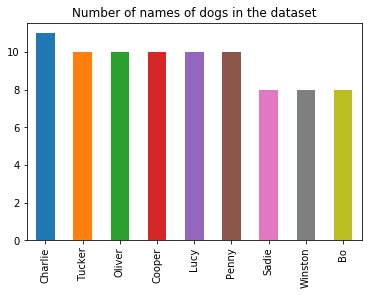

In [132]:
final_df.name.value_counts()[1:10].plot('bar',title = "Number of names of dogs in the dataset")


### Here I have collected the most name dogs have. I have discovered that Charlie name is popular and has the most name.

Text(0.5,1,'number of stage of dogs in the dataset')

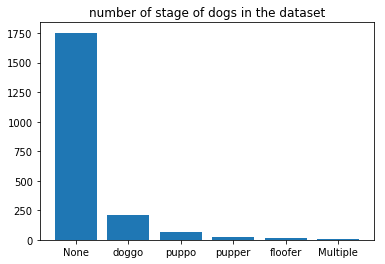

In [133]:
plt.bar(x = final_df.Stage.unique() ,height = final_df.Stage.value_counts())
plt.title('number of stage of dogs in the dataset')

### most of tweets don’t have a stage for the dogs followed by stage doggo which they contain the most in the dataset which means bigger dogs usually showed more. Followed by puppo. What we can see that from older to younger trend.

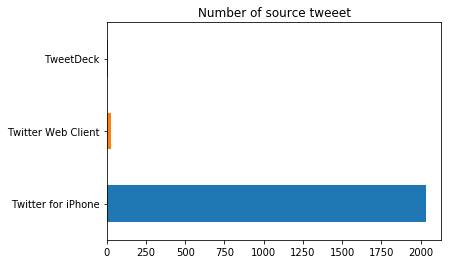

In [134]:
final_df.source.value_counts().plot('barh',title='Number of source tweeet')

### Here I have calculated how many tweets come from source, we can see that this account is iphone user and most his tweets come from it. Followed by twitter website. Only handful comes from tweetdeck.

In [138]:
final_df.to_csv('Desktop/twitter_archive_master.csv')

# Refrence 
http://adilmoujahid.com/posts/2014/07/twitter-analytics/